<a href="https://colab.research.google.com/github/santhosh1417ai/CODSOFT-/blob/main/data_science_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK-2 MOVIE RATING PREDICTION WITH PYTHON**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Optional: Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')
# Load the dataset (assuming it is in a CSV file named 'movies.csv')
# Try different encodings if 'latin-1' doesn't work
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Movie India.csv', encoding='latin-1')

# Display the first few rows of the dataset
print(data)


                                     Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                             #Homecoming -2021.0   90 min   Drama, Musical   
3                                 #Yaaram -2019.0  110 min  Comedy, Romance   
4                       ...And Once Again -2010.0  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga -1988.0      NaN           Action   
15505                               Zulmi -1999.0  129 min    Action, Drama   
15506                           Zulmi Raj -2005.0      NaN           Action   
15507                       Zulmi Shikari -1988.0      NaN           Action   
15508                        Zulm-O-Sitam -1998.0  130 min    Action, Drama   

       Rating Votes            Director           A

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Movie India.csv', encoding='latin-1').drop(columns='Name')
data.dropna(inplace=True)
data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
# Find info about the columns
print(data.isna().sum())
print("-"*60)


Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64
------------------------------------------------------------


In [ ]:
print(data.duplicated().sum())
print(data.shape)
print("-"*60)

0
(5659, 9)
------------------------------------------------------------


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5659 non-null   float64
 1   Duration  5659 non-null   object 
 2   Genre     5659 non-null   object 
 3   Rating    5659 non-null   float64
 4   Votes     5659 non-null   object 
 5   Director  5659 non-null   object 
 6   Actor 1   5659 non-null   object 
 7   Actor 2   5659 non-null   object 
 8   Actor 3   5659 non-null   object 
dtypes: float64(2), object(7)
memory usage: 442.1+ KB


In [ ]:
# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Print the available columns in your DataFrame to verify if 'rating' exists
print(data.columns)




              Year       Rating
count  5659.000000  5659.000000
mean  -1996.247570     5.898533
std      19.741839     1.381165
min   -2021.000000     1.100000
25%   -2013.000000     5.000000
50%   -2002.000000     6.100000
75%   -1983.000000     6.900000
max   -1931.000000    10.000000
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64
Index(['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3'],
      dtype='object')


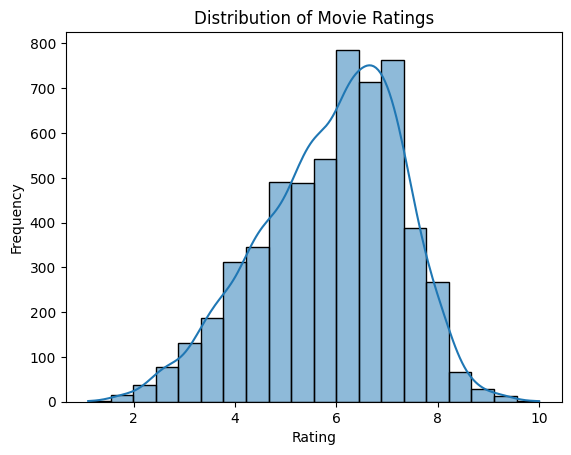

In [ ]:
#@title Distribution
rating_column = 'Rating'

sns.histplot(data[rating_column], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

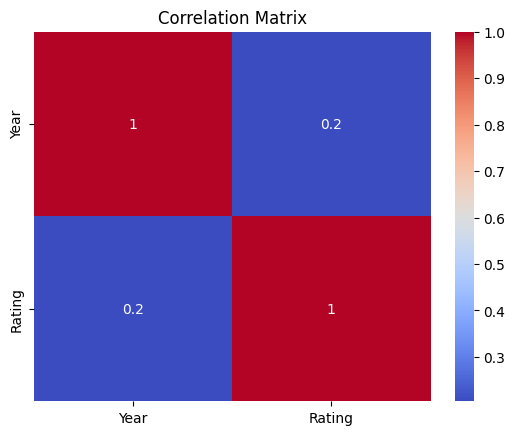

In [ ]:
#@title Correlation Matrix
# Handle non-numerical columns before calculating correlation
# Select only numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix for numerical columns
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

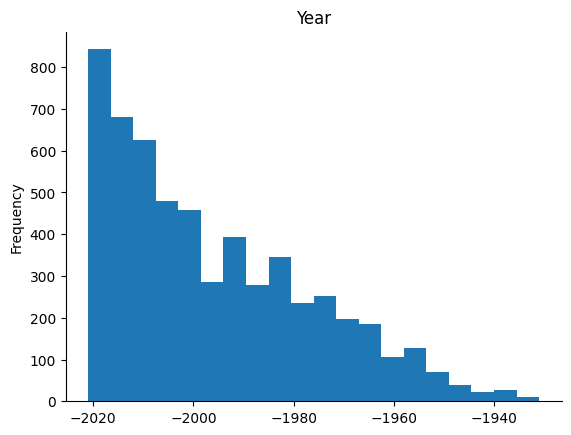

In [ ]:
#@title year
data['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)


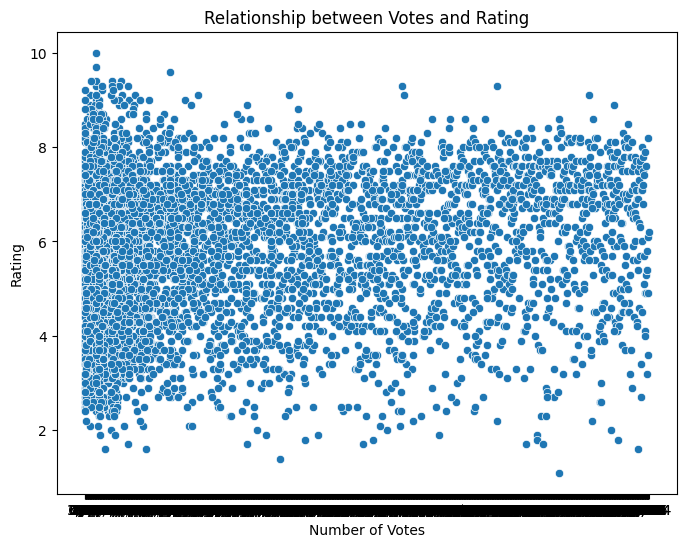

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Votes', y='Rating', data=data)
plt.title('Relationship between Votes and Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()

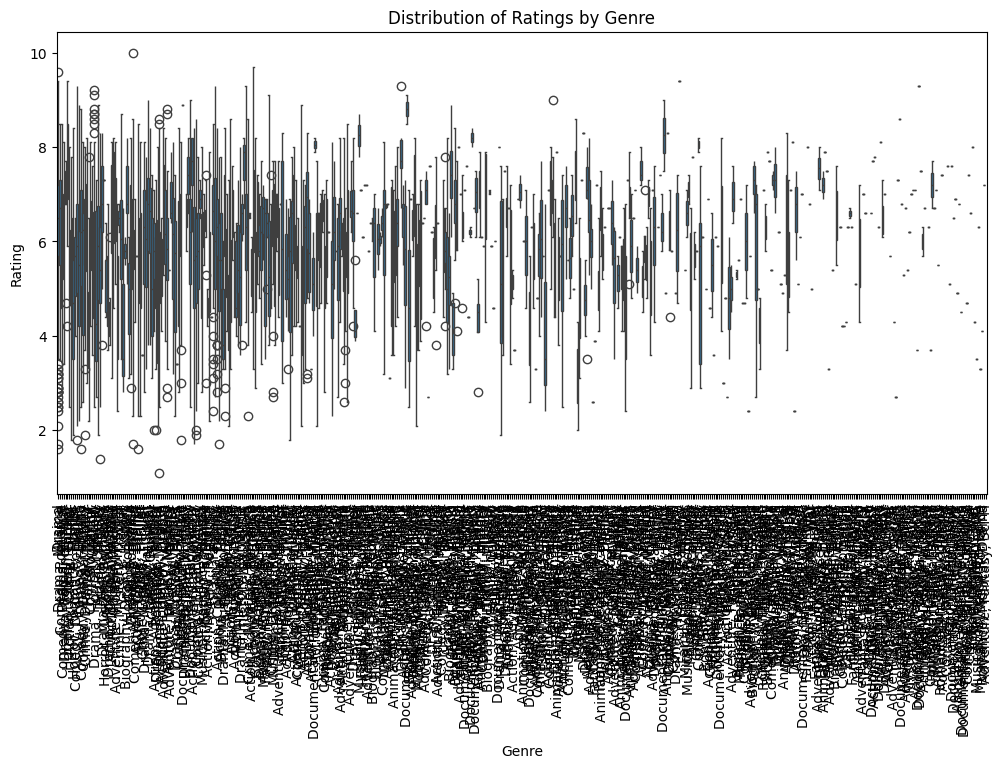

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Rating', data=data)
plt.xticks(rotation=90)
plt.title('Distribution of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

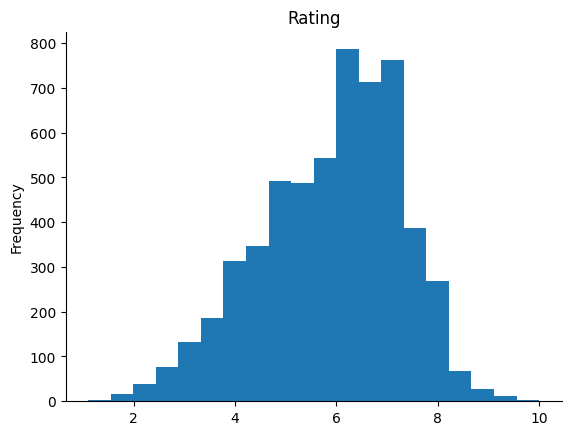

In [ ]:
#@title Rating
data['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

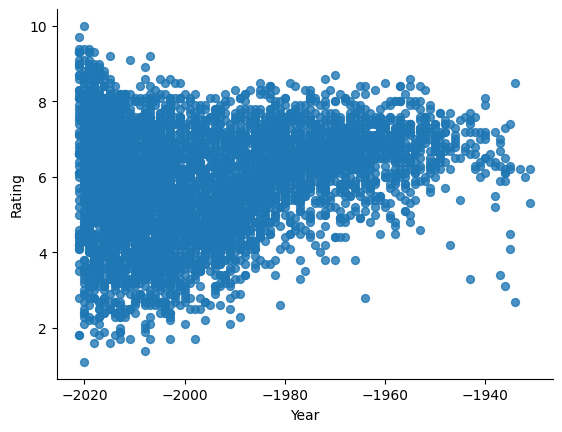

In [ ]:
# @title Year vs Rating
data.plot(kind='scatter', x='Year', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#@title linear regression model
import statsmodels.formula.api as sm

# Assuming 'Rating' is the dependent variable and 'Year', 'Votes' are independent variables
# 'Votes' needs to be numeric, so replace commas and convert to integer
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)

# Fit the linear regression model
result = sm.ols(formula="Rating ~ Year + Votes", data=data).fit()

# Print the regression summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     216.0
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           3.90e-91
Time:                        15:38:11   Log-Likelihood:                -9648.4
No. Observations:                5659   AIC:                         1.930e+04
Df Residuals:                    5656   BIC:                         1.932e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.5489      1.805     20.805      0.0

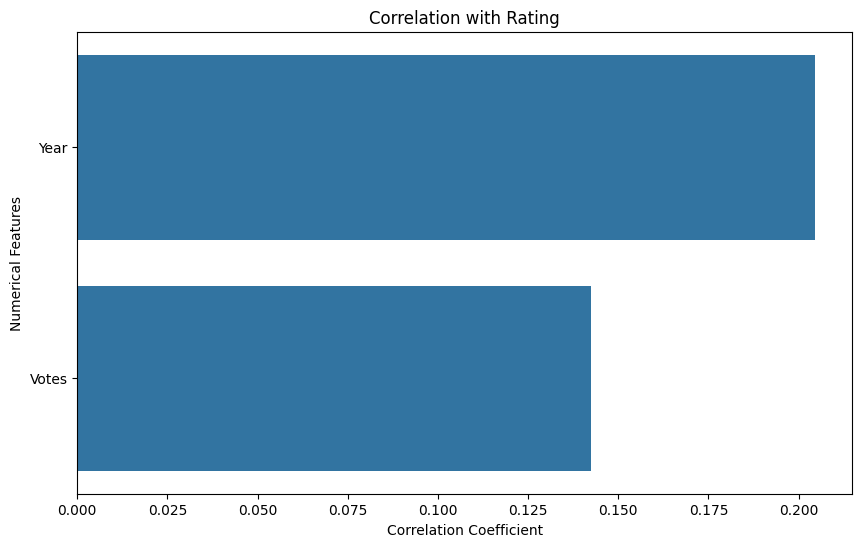

Year     0.204642
Votes    0.142563
dtype: float64


In [ ]:
#@title correlations
# Assuming 'data' is your DataFrame and 'Rating' is the target variable
numerical_features = data.select_dtypes(include=['float', 'int']).columns
numerical_features = numerical_features.drop('Rating')  # Remove the target variable itself

# Calculate correlations
correlations = data[numerical_features].corrwith(data['Rating'])

# Create a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Numerical Features')
plt.title('Correlation with Rating')
plt.show()

# Print correlations sorted by absolute value
print(correlations.abs().sort_values(ascending=False))

In [ ]:
#@title Feature Engineering
# --- Feature Engineering Ideas ---
if 'Actor' in data.columns and 'Director' in data.columns:
    data['Actor_Director_Interaction'] = data['Actor'] + '_' + data['Director']
else:
    print("Warning: 'Actor' or 'Director' column not found. Skipping interaction term creation.")

data['Year_Bin'] = pd.cut(data['Year'], bins=5, labels=False)  # Adjust bins as needed

print(data.head())

     Year Duration                      Genre  Rating  Votes        Director  \
1 -2019.0  109 min                      Drama     7.0      8   Gaurav Bakshi   
3 -2019.0  110 min            Comedy, Romance     4.4     35      Ovais Khan   
5 -1997.0  147 min     Comedy, Drama, Musical     4.7    827    Rahul Rawail   
6 -2005.0  142 min        Drama, Romance, War     7.4   1086  Shoojit Sircar   
8 -2012.0   82 min  Horror, Mystery, Thriller     5.6    326   Allyson Patel   

           Actor 1                 Actor 2          Actor 3  Year_Bin  
1     Rasika Dugal          Vivek Ghamande    Arvind Jangid         0  
3          Prateik              Ishita Raj  Siddhant Kapoor         0  
5       Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor         1  
6  Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma         0  
8        Yash Dave          Muntazir Ahmad     Kiran Bhatia         0  


In [ ]:
#@title Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Text Feature Extraction ---
# Check if 'Description' column exists before proceeding
if 'Description' in data.columns:
    text_data = data['Description'].fillna('')  # Handle missing descriptions

    # Initialize TF-IDF vectorizer
    tfidf = TfidfVectorizer(max_features=100)  # Adjust max_features as needed

    # Fit and transform the text data
    tfidf_matrix = tfidf.fit_transform(text_data)

    # Convert the sparse matrix to a DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

    # Concatenate TF-IDF features with the original DataFrame
    data = pd.concat([data, tfidf_df], axis=1)
else:
    print("Warning: 'Description' column not found. Skipping text feature extraction.")

data['Year_Bin'] = pd.cut(data['Year'], bins=5, labels=False)  # Adjust bins as needed
print(data.head())

     Year Duration                      Genre  Rating  Votes        Director  \
1 -2019.0  109 min                      Drama     7.0      8   Gaurav Bakshi   
3 -2019.0  110 min            Comedy, Romance     4.4     35      Ovais Khan   
5 -1997.0  147 min     Comedy, Drama, Musical     4.7    827    Rahul Rawail   
6 -2005.0  142 min        Drama, Romance, War     7.4   1086  Shoojit Sircar   
8 -2012.0   82 min  Horror, Mystery, Thriller     5.6    326   Allyson Patel   

           Actor 1                 Actor 2          Actor 3  Year_Bin  
1     Rasika Dugal          Vivek Ghamande    Arvind Jangid         0  
3          Prateik              Ishita Raj  Siddhant Kapoor         0  
5       Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor         1  
6  Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma         0  
8        Yash Dave          Muntazir Ahmad     Kiran Bhatia         0  


In [ ]:
#@title training and testing sets
from sklearn.model_selection import train_test_split

features = data.drop('Rating', axis=1)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, data['Rating'], test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4527, 9)
X_test shape: (1132, 9)
y_train shape: (4527,)
y_test shape: (1132,)


In [ ]:
!pip install xgboost

In [ ]:
#@title Model Evaluation
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame and 'Rating' is the target variable
# Select features (excluding the target variable)
features = data.drop('Rating', axis=1)  # Replace 'Rating' with your target variable column name

# --- Handle 'Duration' column ---
# Extract numerical duration from 'Duration' column
features['Duration'] = features['Duration'].str.extract('(\d+)').astype(float)

# --- Handle Categorical Features ---
# Identify categorical columns (object dtype)
categorical_cols = features.select_dtypes(include=['object']).columns

# Use LabelEncoder to convert categorical features to numerical
for col in categorical_cols:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, data['Rating'], test_size=0.2, random_state=42)

# --- Model Selection and Training ---
# 6. XGBoost
model = XGBRegressor(n_estimators=100, random_state=42, enable_categorical=True)  # Enable categorical handling

# Train the selected model
model.fit(X_train, y_train)

# --- Model Evaluation ---
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.3111781047745394
R-squared: 0.2919224496792715
